In [3]:
import pandas as pd

In [4]:
# Importing dataset
dataset = pd.read_csv("C:/dev/online_shoppers_intention/online_shoppers_intention.csv")
# Dataset Checking
print('shape: ',dataset.shape)
print(dataset.info())
print(dataset.describe())

# Columns
print(dataset.head(10))
features = list(dataset.columns)
print('features =', features)

shape:  (12330, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  Tr

In [32]:
# Handling missing data points
dataset.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

[False, True] [10422, 1908]


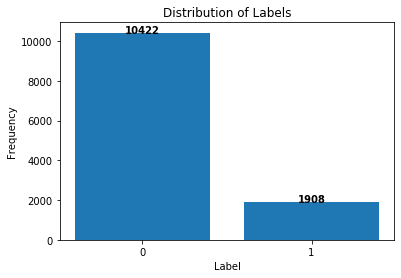

In [29]:
# Revenue Graph
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

labels = Counter(dataset['Revenue'])
revenue = list(labels.keys())
num = list(labels.values())
print(revenue, num)
plt.bar(revenue, num)
plt.xticks([0, 1])
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Distribution of Labels')
for i, v in enumerate(num):    # 수치 값 표시
    plt.text(i, v, str(v), ha='center', fontweight='bold')
plt.show()

In [30]:
# Handling catagorical data
# 1) object type - One Hot Encoding
df = dataset.copy()
month = pd.get_dummies(df['Month'])
df.drop('Month', axis=1, inplace=True)  # inplace=True: 반환받지 않고 기존 df이 변경되도록
df = pd.concat([df, month], axis=1)  # column bind

visitortype = pd.get_dummies(df['VisitorType'])
df.drop('VisitorType', axis=1, inplace=True)
df = pd.concat([df, visitortype], axis=1)

In [31]:
df.head()
# df.columns

# 2) bool type - int type
df['Weekend'] = df['Weekend'].astype(int)
weekend = pd.get_dummies(df['Weekend'])
# df.drop('Weekend', axis=1, inplace=True)
df['Revenue'] = df['Revenue'].astype(int)
revenue = pd.get_dummies(df['Revenue'])
# df.drop('Revenue', axis=1, inplace=True)

In [32]:
df.describe()
df['Revenue'].head()

0    0
1    0
2    0
3    0
4    0
Name: Revenue, dtype: int32

In [33]:
# Train/Test Split
from sklearn.model_selection import train_test_split

X = dataset.iloc[:, :17]
Y = dataset.iloc[:, -1]
print('X shape:', X.shape)
print('Y shape:', Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, random_state=123, shuffle=True)

X shape: (12330, 17)
Y shape: (12330,)
